In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns;

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'udacity-mlcharity-competition',
 'udacity-mlcharity-competition.ipynb',
 'udacity-mlcharity-competition.zip']

In [4]:
data=pd.read_csv('udacity-mlcharity-competition/census.csv')

In [5]:
data.isnull().sum().sort_values(ascending=False)

income             0
native-country     0
hours-per-week     0
capital-loss       0
capital-gain       0
sex                0
race               0
relationship       0
occupation         0
marital-status     0
education-num      0
education_level    0
workclass          0
age                0
dtype: int64

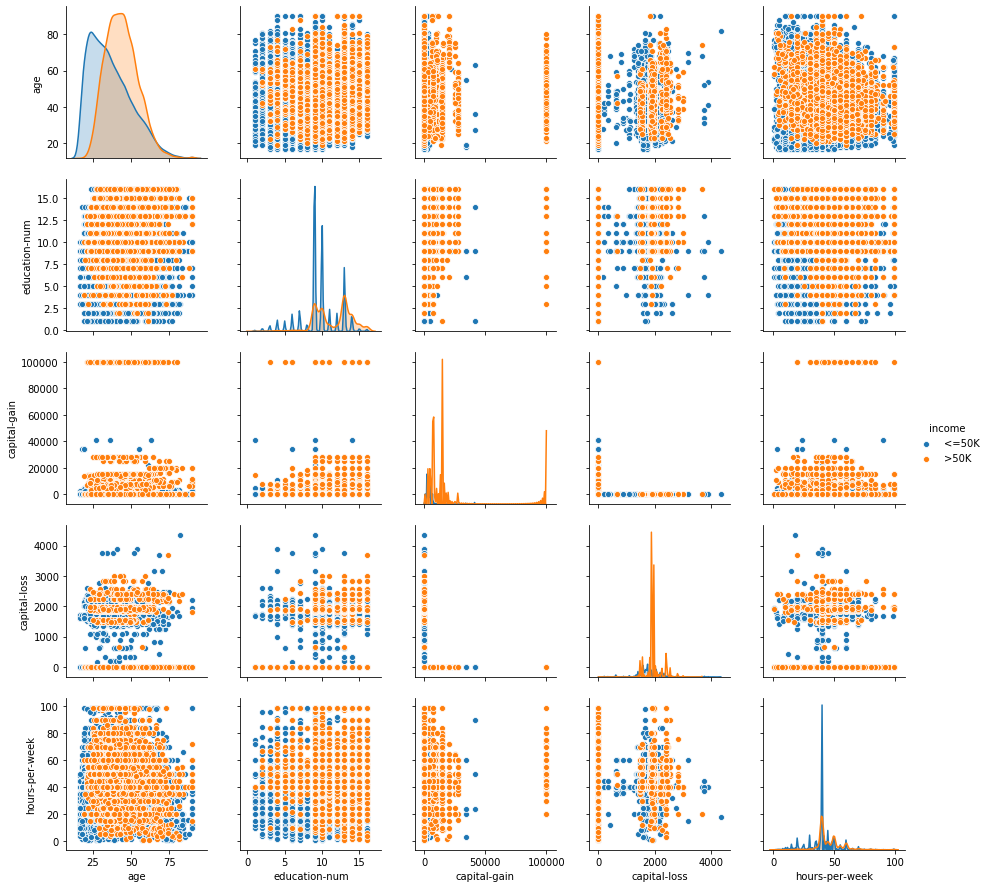

In [7]:
g = sns.pairplot(data, hue="income")

In [8]:
data.head()

age          workclass education_level  education-num       marital-status  \
0   39          State-gov       Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
2   38            Private         HS-grad            9.0             Divorced   
3   53            Private            11th            7.0   Married-civ-spouse   
4   28            Private       Bachelors           13.0   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male        2174.0   
1     Exec-managerial         Husband   White     Male           0.0   
2   Handlers-cleaners   Not-in-family   White     Male           0.0   
3   Handlers-cleaners         Husband   Black     Male           0.0   
4      Prof-specialty            Wife   Black   Female           0.0   

   capital-loss  hours-per-week  native-country income  
0           0.0            40.0   United-States  <=50K  
1           0.0            13.0   United-States  <=50K  
2           0.0            40.0   United-States  <=50K  
3           0.0            40.0   United-States  <=50K  
4           0.0            40.0            Cuba  <=50K

In [10]:
str_col=data.select_dtypes(include=['object']).columns
num_col=data.select_dtypes(include=['int64','float64']).columns

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X=LabelEncoder()

In [12]:
for x in str_col:    
    data.loc[:, x]=labelencoder_X.fit_transform(data.loc[:,x])

In [13]:
data.head()

age  workclass  education_level  education-num  marital-status  occupation  \
0   39          5                9           13.0               4           0   
1   50          4                9           13.0               2           3   
2   38          2               11            9.0               0           5   
3   53          2                1            7.0               2           5   
4   28          2                9           13.0               2           9   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             1     4    1        2174.0           0.0            40.0   
1             0     4    1           0.0           0.0            13.0   
2             1     4    1           0.0           0.0            40.0   
3             0     2    1           0.0           0.0            40.0   
4             5     2    0           0.0           0.0            40.0   

   native-country  income  
0              38       0  
1              38       0  
2              38       0  
3              38       0  
4               4       0

In [14]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [16]:
features = data.iloc[:, :-1].values
labels = data.iloc[:, -1].values

In [17]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [18]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (33916, 13)
Training Labels Shape: (33916,)
Testing Features Shape: (11306, 13)
Testing Labels Shape: (11306,)


In [20]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [21]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(train_features, train_labels);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 80.2min finished


In [22]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}
 
 train_features, test_features, train_labels, test_labels

In [26]:
classifier = RandomForestClassifier(n_estimators = 400, criterion = 'entropy', random_state = 42,min_samples_split= 10,min_samples_leaf=4,max_features= 'auto',max_depth= 70,bootstrap= True)
classifier.fit(train_features,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=70, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
y_pred = classifier.predict(test_features)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( test_labels, y_pred)

In [29]:
cm

array([[7990,  466],
       [1080, 1770]], dtype=int64)

In [54]:
test=pd.read_csv('udacity-mlcharity-competition/test_census.csv')

In [62]:
test.isnull().sum().sort_values(ascending=False)

native-country     0
hours-per-week     0
capital-loss       0
capital-gain       0
sex                0
race               0
relationship       0
occupation         0
marital-status     0
education-num      0
education_level    0
workclass          0
age                0
dtype: int64

In [56]:
test['occupation'].fillna(test['occupation'].mode(),inplace=True)

In [58]:
str_col_test=test.select_dtypes(include='object').columns
num_col_test=test.select_dtypes(include=['int64','float64']).columns

In [48]:
for x in str_col_test:   
    test[x]=test[x].fillna(test[x].mode())

In [59]:
for x in num_col_test:   
    test[x]=test[x].fillna(test[x].median())

In [61]:
test.fillna(method='ffill',inplace=True)

In [67]:
test.head()

age  workclass  education_level  education-num  marital-status  \
0  21.0          2                0            6.0               2   
1  49.0          2                9           13.0               2   
2  44.0          4                7           12.0               2   
3  34.0          2                9           13.0               2   
4  24.0          2               11            9.0               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           2             0     4    1           0.0           0.0   
1           0             5     4    0           0.0           0.0   
2           7             5     4    0           0.0           0.0   
3          11             0     4    1        7298.0           0.0   
4           6             0     4    1           0.0           0.0   

   hours-per-week  native-country  
0            40.0              38  
1            40.0              38  
2            99.0              38  
3            46.0              38  
4            40.0              38

In [66]:
for x in str_col_test:    
    test.loc[:, x]=labelencoder_X.fit_transform(test.loc[:,x])

In [68]:
pred=classifier.predict(test)

In [69]:
sub=pd.DataFrame()

In [70]:
sub['id']=range(0,len(pred))

In [71]:
sub['income']=pred

In [72]:
sub.to_csv('submission_1.csv',index=False)